In [81]:
#### COMPARE the predictions ####

In [82]:
import maui

In [83]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import maui.utils

In [84]:
data1 = pd.read_csv('PAAD_methy_R.csv', index_col=0)
data2 = pd.read_csv('PAAD_counts_R.csv', index_col=0)


In [85]:
label = pd.read_csv('label.csv', index_col=0)

In [86]:
data2 = data2.filter(items= data1.index, axis =0)
print(data2.shape)
data1.shape

(181, 8495)


(181, 2393)

In [87]:
maui_model = maui.Maui(n_hidden=[1300, 600], n_latent=10, epochs=100)
%time z = maui_model.fit_transform({'methy': data1.T, 'counts': data2.T})

/usr/local/lib/python3.7/dist-packages/keras/engine/training_utils.py:819: UserWarning: Output reconstruction missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to reconstruction.
  'be expecting any data to be passed to {0}.'.format(name))


CPU times: user 7min 48s, sys: 12 s, total: 8min
Wall time: 4min 36s


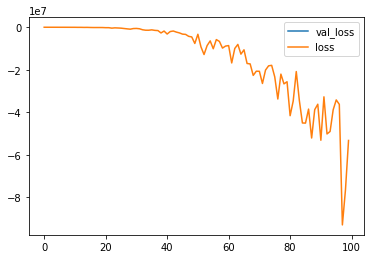

In [88]:
maui_model.hist.plot()

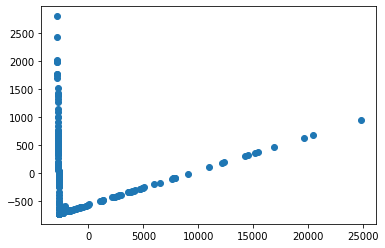

In [89]:
plt.scatter(pcs.loc[:,'PC1'], pcs.loc[:, 'PC2'])

In [90]:
y = label.loc[:,'vital_status.demographic']

In [92]:
# export z and try to predict survival
z.to_csv('MAUI_z_PAAD.csv')

In [99]:
### READ BRCA data survival
m = pd.read_csv('methy_BRCA.csv', index_col = 0)
c = pd.read_csv('BRCA_counts_R.csv', index_col = 0)

print(m.shape)
print(c.shape)

maui_model = maui.Maui(n_hidden=[1300, 600], n_latent=10, epochs=100)
%time z = maui_model.fit_transform({'methy': m.T, 'counts': c.T})

(787, 1312)
(787, 16498)


/usr/local/lib/python3.7/dist-packages/keras/engine/training_utils.py:819: UserWarning: Output reconstruction missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to reconstruction.
  'be expecting any data to be passed to {0}.'.format(name))


CPU times: user 48min 38s, sys: 51.6 s, total: 49min 30s
Wall time: 27min 53s


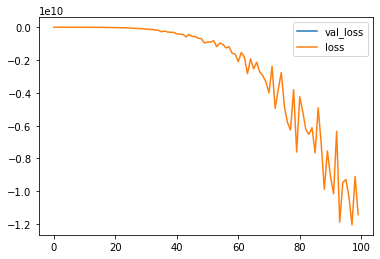

In [100]:
maui_model.hist.plot()

In [102]:
z.to_csv('MAUI_z_BRCA_surv.csv')

In [ ]:
#### IMPORTING data for the BRCA ER status

c2 = pd.read_csv('MAUI_BRCA_ER_counts.csv', index_col = 0)
m2 = pd.read_csv('MAUI_methy_ER.csv', index_col = 0)

print(m2.shape)
print(c2.shape)

maui_model = maui.Maui(n_hidden=[1400, 600], n_latent=10, epochs=100)
%time z = maui_model.fit_transform({'methy': m2.T, 'counts': c2.T})


(743, 1323)
(743, 16042)


/usr/local/lib/python3.7/dist-packages/keras/engine/training_utils.py:819: UserWarning: Output reconstruction missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to reconstruction.
  'be expecting any data to be passed to {0}.'.format(name))


In [ ]:
maui_model.hist.plot()
z.to_csv('MAUI_z_BRCA_ER.csv')